# Coursework Output 2
*Instructions*: In this coursework, you will show your domain of the data related Python skills required for business analytics. To do so, you will use packages such as *numpy* and *matplotlib*.

## Importing and Visualising a Dataset in Python
Each student will be assigned a different dataset in a *comma separated value* (*.csv*) format. The main goal is to import such dataset into Python so that you can wrangle and visualise the data in better ways. This will allow you to get your own conclusions and start building up knowledge regarding on how you could potentially learn from data to predict or classify future instances.

You must create a program which allows you to select from the following options:
1. Import and print your dataset into Python as a numpy array.
2. Query and print an instance of the dataset by row number or by id (i.e. first column of the table).
3. Create a "reduced" dataset (i.e. with less columns) by indicating a list of column names to bring upon this newly created dataset.
4. Plot the dataset by means of a scatterplot which relates two columns specified by the user. The plot has to show the $x$ and $y$ axis labels as the chosen columns, and use the *target/class* column (i.e. the last one) as the colour variable.
5. Exit the program.

## Additional Considerations
* The program has to check that every input is valid.
* No option (except for exit) can be executed until option 1 is executed first.

## Submission Instructions

* Once that you have finished your program, run all cells and run the main program cell using the following sequence of options: 0(wrong option),2(has to fail),1,2(by row index),2(by row name),3,4,5. 
* Then, without clearing the kernel, generate a html **OR** pdf file from the Jupyter notebook. 
* Clear the Jupyter notebook kernel, then name both the Jupyter notebook and the html/pdf files with your id number and submit them to the corresponding Moodle's dropbox before **12th December, 2019**.

In [1]:
## Use this cell to import all necessary packages
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Use this cell to define the function corresponding to OPTION 1
def option1():
    '''With this function you import the dataset into a numpy array.'''
    
    global fifa_names
    global names
    global fifa
    
    data_names = np.genfromtxt('fifa.csv', delimiter = ',', dtype = str)
    fifa_names = data_names[0,:]
    fifa_names[0] = 'player_id'
    names = fifa_names.tolist()

    fifa = np.genfromtxt('fifa.csv', delimiter = ',', dtype = int)
    fifa = fifa[1:,:]

    np.set_printoptions(threshold=np.inf)

    print(fifa_names)
    print(fifa)
    
    
    return fifa,names

In [3]:
## Use this cell to define the function corresponding to OPTION 2

def option2():
    '''This function queries and prints a row of the dataset (by row number or id).'''
    
    while True:
        a = input('Select "1" to query by row number or "2" to query by row name: ')

        if a == '1':
            while True:
                try:
                    print('Select the row number to query (indexes start in 0).')
                    print('Remember that you can access rows starting from the last one with negative numbers: ')
                    input_row_number = int(input())
                
                    if input_row_number < np.size(fifa,0):
                        print(fifa[input_row_number,:])
                        break
                    
                    else:
                        print('The index number is unvalid. Please try again.')
                    
                except ValueError:
                    print('Invalid input. Please enter a number.')
                
            break

        elif a == '2':
            while True:
                try:
                    input_id = int(input('Select the id to query: '))
                
                    if np.any(fifa[:, 0] == input_id):
                        print(fifa[np.where(fifa[:,0] == input_id), :])           
                        break
                                  
                    else:
                        print("This id does not exist in the dataset.")
                
                except ValueError:
                    print('Invalid input. Please enter a number.')
                
            break

        else:
            print('Invalid input. Please enter "1" or "2".')
   

    return 

In [4]:
## Use this cell to define the function corresponding to OPTION 3

def option3():
    '''This function creates a new dataset by indicating which columns to include.'''
    
    column_names = []
    columns = []
    m = True
    
    while m:
        
        print('Indicate a column to include:')
        print(names)
        input_column = input().lower() # input

        if input_column in names:
        
            column_names.append(input_column) # put input in list "column_names"
            index_column = names.index(input_column) # take the index of that column input
            columns.append(index_column) # put index in list "columns"
        
            m = False
        
            n = True
            while n:
            
                c = input('Do you want to indicate another column? (Yes/No): ').capitalize()
            
                if c == "Yes":
                    print('Indicate a column to include: ')
                    print(names)
                
                    input_column2 = input().lower() # input
                
                    column_names.append(input_column2) # put input in list "column_names"
                    index_column2 = names.index(input_column2) # take index of second input
                    columns.append(index_column2) # put index in list "columns"
        
                elif c == "No":
                    print("Showing the reduced dataset...")
                
                    print(column_names)
                    print(fifa[:,columns])
                
                    n = False
            
                else:
                    print('Please, enter either "Yes" or "No".')

        else:
            print('Please enter one of the columns shown.')
        

    return

In [5]:
## Use this cell to define the function corresponding to OPTION 4

def option4():
    '''This function visualises the dataset using a scatterplot.'''
    
    j = True
    while j:

        print('Select the variable to use as x axis:')
        print(names)
        x_name = input().lower()

        if x_name in names:
    
            k = True
            while k:
        
                print('Select the variable to use as y axis:')
                print(names)
                y_name = input().lower()
    
                if y_name in fifa_names and y_name != x_name:

                    category = fifa[:,-1]

                    x_variable = fifa[:,names.index(x_name)]
                    y_variable = fifa[:,names.index(y_name)]

                    cdict = {1: 'deepskyblue', 2: 'tomato', 3: 'lime', 4: 'gold'}

                    fig, ax = plt.subplots()
                    for g in np.unique(category):
                        ix = np.where(category == g)
                        ax.scatter(x_variable[ix], y_variable[ix], c = cdict[g], label = g, s = 100)
                    ax.legend()
                    ax.grid(True)
                    plt.title("Scatterplot " + x_name + " vs. " + y_name)
                    plt.xlabel(x_name)
                    plt.ylabel(y_name)
                    plt.show()
                
                    j = False
                    k = False
        
        
        
                else:
                    print('The selected variable does not exist or it has already been selected. Please select of the existing variables.')
        

        else:
            print('The selected variable does not exist. Please select of the existing variables.')

    return

In [6]:
## Use this cell to create the "main" part of your program

print("Welcome to Elia Richter 1911547 business case.")

options = []
y = True

while y:
    print('Welcome to my menu. Select an option (1,2,3,4,5): ')
    y = input()
    options.append(y)
    
    if y == '1':
        option1()
    
    elif y == '2':
        if '1' in options:
            option2()
        else:
            print('Select option 1 first!')
        
    elif y == '3':
        if '1' in options:
            option3()
        else:
            print('Select option 1 first!')
        
    elif y == '4':
        if '1' in options: 
            option4()
        else:
            print('Select option 1 first.')
        
    elif y == '5':
        print('Exiting the program')
        y = False
    else:
        print('Invalid option. Try again!')


Welcome to Elia Richter 1911547 business case.
Welcome to my menu. Select an option (1,2,3,4,5): 
potato
Invalid option. Try again!
Welcome to my menu. Select an option (1,2,3,4,5): 
2
Select option 1 first!
Welcome to my menu. Select an option (1,2,3,4,5): 
1
['player_id' 'age' 'height_cm' 'weight_kg' 'value_euro' 'overall'
 'potential' 'pac' 'sho' 'pas' 'dri' 'def' 'phy' 'category']
[[    20801        32       185        80  95500000        94        94
         90        93        82        90        33        80         1]
 [   158023        30       170        72 105000000        93        93
         89        90        86        96        26        61         1]
 [   190871        25       175        68 123000000        92        94
         92        84        79        95        30        60         1]
 [   176580        30       182        86  97000000        92        92
         82        90        79        87        42        81         1]
 [   167495        31       193 

2
Select "1" to query by row number or "2" to query by row name: potato
Invalid input. Please enter "1" or "2".
Select "1" to query by row number or "2" to query by row name: 3
Invalid input. Please enter "1" or "2".
Select "1" to query by row number or "2" to query by row name: 1
Select the row number to query (indexes start in 0).
Remember that you can access rows starting from the last one with negative numbers: 
potato
Invalid input. Please enter a number.
Select the row number to query (indexes start in 0).
Remember that you can access rows starting from the last one with negative numbers: 
10000
The index number is unvalid. Please try again.
Select the row number to query (indexes start in 0).
Remember that you can access rows starting from the last one with negative numbers: 
0
[   20801       32      185       80 95500000       94       94       90
       93       82       90       33       80        1]
Welcome to my menu. Select an option (1,2,3,4,5): 
2
Select "1" to query by

IndexError: index -1000000 is out of bounds for axis 0 with size 199

**Notice that your program crashes if trying to access from last to first in an invalid way**

In [8]:
## Use this cell to create the "main" part of your program

print("Welcome to Elia Richter 1911547 business case.")

options = []
y = True

while y:
    print('Welcome to my menu. Select an option (1,2,3,4,5): ')
    y = input()
    options.append(y)
    
    if y == '1':
        option1()
    
    elif y == '2':
        if '1' in options:
            option2()
        else:
            print('Select option 1 first!')
        
    elif y == '3':
        if '1' in options:
            option3()
        else:
            print('Select option 1 first!')
        
    elif y == '4':
        if '1' in options: 
            option4()
        else:
            print('Select option 1 first.')
        
    elif y == '5':
        print('Exiting the program')
        y = False
    else:
        print('Invalid option. Try again!')


Welcome to Elia Richter 1911547 business case.
Welcome to my menu. Select an option (1,2,3,4,5): 
1
['player_id' 'age' 'height_cm' 'weight_kg' 'value_euro' 'overall'
 'potential' 'pac' 'sho' 'pas' 'dri' 'def' 'phy' 'category']
[[    20801        32       185        80  95500000        94        94
         90        93        82        90        33        80         1]
 [   158023        30       170        72 105000000        93        93
         89        90        86        96        26        61         1]
 [   190871        25       175        68 123000000        92        94
         92        84        79        95        30        60         1]
 [   176580        30       182        86  97000000        92        92
         82        90        79        87        42        81         1]
 [   167495        31       193        92  61000000        92        92
         91        90        95        89        60        91         1]
 [   188545        28       185        79  92000

2
Select "1" to query by row number or "2" to query by row name: 2
Select the id to query: 0
This id does not exist in the dataset.
Select the id to query: 230621
[[[  230621       18      196       90 28500000       82       94
         88       78       72       88       50       78        4]]]
Welcome to my menu. Select an option (1,2,3,4,5): 
3
Indicate a column to include:
['player_id', 'age', 'height_cm', 'weight_kg', 'value_euro', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'category']
potato
Please enter one of the columns shown.
Indicate a column to include:
['player_id', 'age', 'height_cm', 'weight_kg', 'value_euro', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'category']
player_id
Do you want to indicate another column? (Yes/No): y
Please, enter either "Yes" or "No".
Do you want to indicate another column? (Yes/No): Yes
Indicate a column to include: 
['player_id', 'age', 'height_cm', 'weight_kg', 'value_euro', 'overall', 'potential

ValueError: '' is not in list

**Your program crashed when I inserted an empty string**

Welcome to Elia Richter 1911547 business case.
Welcome to my menu. Select an option (1,2,3,4,5): 
1
['player_id' 'age' 'height_cm' 'weight_kg' 'value_euro' 'overall'
 'potential' 'pac' 'sho' 'pas' 'dri' 'def' 'phy' 'category']
[[    20801        32       185        80  95500000        94        94
         90        93        82        90        33        80         1]
 [   158023        30       170        72 105000000        93        93
         89        90        86        96        26        61         1]
 [   190871        25       175        68 123000000        92        94
         92        84        79        95        30        60         1]
 [   176580        30       182        86  97000000        92        92
         82        90        79        87        42        81         1]
 [   167495        31       193        92  61000000        92        92
         91        90        95        89        60        91         1]
 [   188545        28       185        79  92000

3
Indicate a column to include:
['player_id', 'age', 'height_cm', 'weight_kg', 'value_euro', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'category']
player_id
Do you want to indicate another column? (Yes/No): Yes
Indicate a column to include: 
['player_id', 'age', 'height_cm', 'weight_kg', 'value_euro', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'category']
player_id
Do you want to indicate another column? (Yes/No): Yes
Indicate a column to include: 
['player_id', 'age', 'height_cm', 'weight_kg', 'value_euro', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'category']
age
Do you want to indicate another column? (Yes/No): No
Showing the reduced dataset...
['player_id', 'player_id', 'age']
[[ 20801  20801     32]
 [158023 158023     30]
 [190871 190871     25]
 [176580 176580     30]
 [167495 167495     31]
 [188545 188545     28]
 [193080 193080     26]
 [183277 183277     26]
 [182521 182521     27]
 [167664 167664     29]

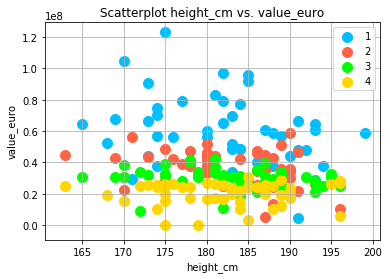

Welcome to my menu. Select an option (1,2,3,4,5): 
5
Exiting the program


In [9]:
## Use this cell to create the "main" part of your program

print("Welcome to Elia Richter 1911547 business case.")

options = []
y = True

while y:
    print('Welcome to my menu. Select an option (1,2,3,4,5): ')
    y = input()
    options.append(y)
    
    if y == '1':
        option1()
    
    elif y == '2':
        if '1' in options:
            option2()
        else:
            print('Select option 1 first!')
        
    elif y == '3':
        if '1' in options:
            option3()
        else:
            print('Select option 1 first!')
        
    elif y == '4':
        if '1' in options: 
            option4()
        else:
            print('Select option 1 first.')
        
    elif y == '5':
        print('Exiting the program')
        y = False
    else:
        print('Invalid option. Try again!')


## Questions
Please answer the following questions to appraise your level of engagement with the content of the course. Use the Markdown cell corresponding to each question to write your answers.

1. Is there any other data structure or module in Python (besides *numpy*) which would allow you to import a *.csv* file in a more practical and manageable way? Use a code cell to support your answer.

**ANSWER:**

In [10]:
# we can use the pandas package to import a .csv file directly as a dataframe, which is another data structure
# that represents tables in a more practical way compared to numpy arrays. 

import pandas as pd # importing the package

fifa_dataframe = pd.read_csv("fifa.csv") # uploading the dataset

fifa_dataframe # printing out the dataset

# as we can see, pandas dataframes look cleaner and more intuitive
        

,player id,age,height_cm,weight_kg,value_euro,overall,potential,pac,sho,pas,dri,def,phy,category
0,20801,32,185,80,95500000,94,94,90,93,82,90,33,80,1
1,158023,30,170,72,105000000,93,93,89,90,86,96,26,61,1
2,190871,25,175,68,123000000,92,94,92,84,79,95,30,60,1
3,176580,30,182,86,97000000,92,92,82,90,79,87,42,81,1
4,167495,31,193,92,61000000,92,92,91,90,95,89,60,91,1
5,188545,28,185,79,92000000,91,91,81,88,75,86,38,82,1
6,193080,26,193,76,64500000,90,92,90,85,87,90,58,86,1
7,183277,26,173,76,90500000,90,91,90,82,84,92,32,66,1
8,182521,27,182,78,79000000,90,90,56,81,89,81,73,70,1
9,167664,29,184,87,77000000,90,90,79,87,70,83,25,74,1


2. Using any of the two continuous variables of your dataset, using a cell code show an example of how a **linear regression** could be applied with your dataset to predict the values of future entries of data without target/class (you can implement linear regressions using existing Python modules). Moreover, discuss if there is any metric that can be used to decide which two variables are the most correlated.

**ANSWER:**

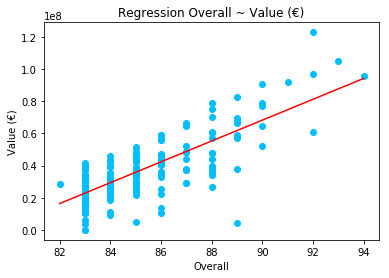

In [12]:
## first we import the packages and csv

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

fifa_dataframe = pd.read_csv("fifa.csv")

## for this example we will use the variables "overall" and "value_euro"

overall = fifa_dataframe["overall"]
value_euro = fifa_dataframe["value_euro"]

# reshaping data

x = overall.values.reshape(-1, 1)  
y = value_euro.values.reshape(-1, 1)

model = LinearRegression().fit(x, y) # fitting the regression model 
prediction = model.predict(x) # predicting the model

# plot the regression line (in red) with data (in blue)

plt.scatter(x, y, color = 'deepskyblue')
plt.plot(x, prediction, color = 'red')
plt.xlabel("Overall")
plt.ylabel("Value (€)")
plt.title("Regression Overall ~ Value (€)")
plt.show()


In [13]:
# if we want to predict the value in euro for a player based on his/her overall

# the same code as above to fit the model first

from sklearn.linear_model import LinearRegression
fifa_dataframe = pd.read_csv("fifa.csv")

overall = fifa_dataframe["overall"]
value_euro = fifa_dataframe["value_euro"]
x = overall.values.reshape(-1, 1)  
y = value_euro.values.reshape(-1, 1)
model = LinearRegression().fit(x, y)

# ask for user's input of overall value

while True:
    try:
        overall_input = int(input('Enter an hypothetical overall value: '))
        
        if overall_input < 0 or overall_input > 100: # usually the overalls on fifa are between 0 and 100
            print('Please enter a reasonable overall (between 0 and 100).')
        
        else:
            prediction1 = model.predict([[overall_input]])
            print('The value in euro for an hypothetical player with this overall is: ' + str(prediction1[0][0]))
            
            break

    except ValueError:
        print('Please enter a number.')
        
# please note that the some predicted values can be negative
# if we want to limit to only positive value, then only overalls of 80 and above should be entered

while True:
    try:
        overall_input = int(input('Enter an hypothetical overall value (80 and above): '))
        
        if overall_input < 80 or overall_input > 100: # usually the overalls on fifa are between 0 and 100
            print('Please enter a reasonable overall (this time between 80 and 100).')
        
        else:
            prediction1 = model.predict([[overall_input]])
            print('The value in euro for an hypothetical player with this overall is: ' + str(prediction1[0][0]))
            
            break

    except ValueError:
        print('Please enter a number.')


Enter an hypothetical overall value: 85
The value in euro for an hypothetical player with this overall is: 35860315.21225977
Enter an hypothetical overall value (80 and above): 89
The value in euro for an hypothetical player with this overall is: 61802393.1437701


In [11]:
# if we want to find which two variables are the most correlated, we can use the function dataframe.corr()
# for pandas dataframes, which computes all the possible correlations

import pandas as pd
fifa_dataframe = pd.read_csv("fifa.csv")

correlation = fifa_dataframe.corr(method = 'pearson') # correlation matrix with pearson method, which is the common one

# since we are interested only in the two most correlated variables, it is helpful to sort all the correlations
# and put them in descending order o ascending order, based on whether the correlation is positive or negative


# for highest positive correlation


corr = correlation.unstack()
pos_corr = corr[(corr< 1) & (corr> 0)] #selecting only positive correlations and excluding correlations with values = 1
                                       #because in these cases a variable is correlated with itself

pos1 = pos_corr.sort_values(ascending = False).head(1) #putting them in descending order so that only the highest
                                                       #correlation is returned

# for highest negative correlation

neg_corr = corr[(corr> -1) & (corr< 0)] #selecting only negative correlations

neg1 = neg_corr.sort_values(ascending = True).head(1) #returning only highest negative correlation


# printing them out

print("The highest positive correlation is: " + pos1.to_string())

print("The highest negative correlation is: " + neg1.to_string())


The highest positive correlation is: height_cm  weight_kg    0.8498
The highest negative correlation is: overall  category   -0.865218
